In [1]:
# Importing libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Datasets/Combined_Dataset.csv')

In [2]:
df.head()

,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present
0,CO,Healthcare Provider,26609.0,Hacking/IT Incident,Email,No
1,WI,Healthcare Provider,907.0,Unauthorized Access/Disclosure,Email,No
2,NH,Healthcare Provider,34878.0,Hacking/IT Incident,Network Server,No
3,CA,Healthcare Provider,500.0,Theft,Paper/Films,No
4,OH,Healthcare Provider,2716.0,Hacking/IT Incident,"Laptop, Network Server",No


In [3]:
df.shape

(4223, 6)

In [4]:
# Checking to see if there is any nan elements within the dataset
df.isnull().sum()

State                                 53
Covered Entity Type                 1124
Individuals Affected                  60
Type of Breach                        46
Location of Breached Information      43
Business Associate Present            37
dtype: int64

In [5]:
# Removing any nan elements from each of the following columns
df.dropna(subset = ['State'], inplace = True)
df.dropna(subset = ['Covered Entity Type'], inplace = True)
df.dropna(subset = ['Individuals Affected'], inplace = True)
df.dropna(subset = ['Type of Breach'], inplace = True)
df.dropna(subset = ['Location of Breached Information'], inplace = True)

In [6]:
# Re-checking to see if there is still any nan elements within the dataset
df.isnull().sum()

State                               0
Covered Entity Type                 0
Individuals Affected                0
Type of Breach                      0
Location of Breached Information    0
Business Associate Present          0
dtype: int64

## Univariate Analysis

CA    300
TX    255
NY    225
FL    198
IL    133
PA    130
OH    119
GA     93
MA     92
IN     86
MI     85
MN     84
NC     79
MO     71
TN     68
MD     66
VA     63
WA     62
CO     60
AZ     57
CT     56
KY     55
NJ     52
AR     46
WI     42
OR     38
SC     38
IA     32
LA     32
AL     31
NM     30
UT     28
OK     23
PR     23
NE     21
DE     18
NV     18
KS     17
DC     14
WV     13
MT     13
AK     12
ME     12
MS     11
RI     10
WY     10
ID      9
NH      8
ND      7
HI      5
VT      4
SD      4
Name: State, dtype: int64

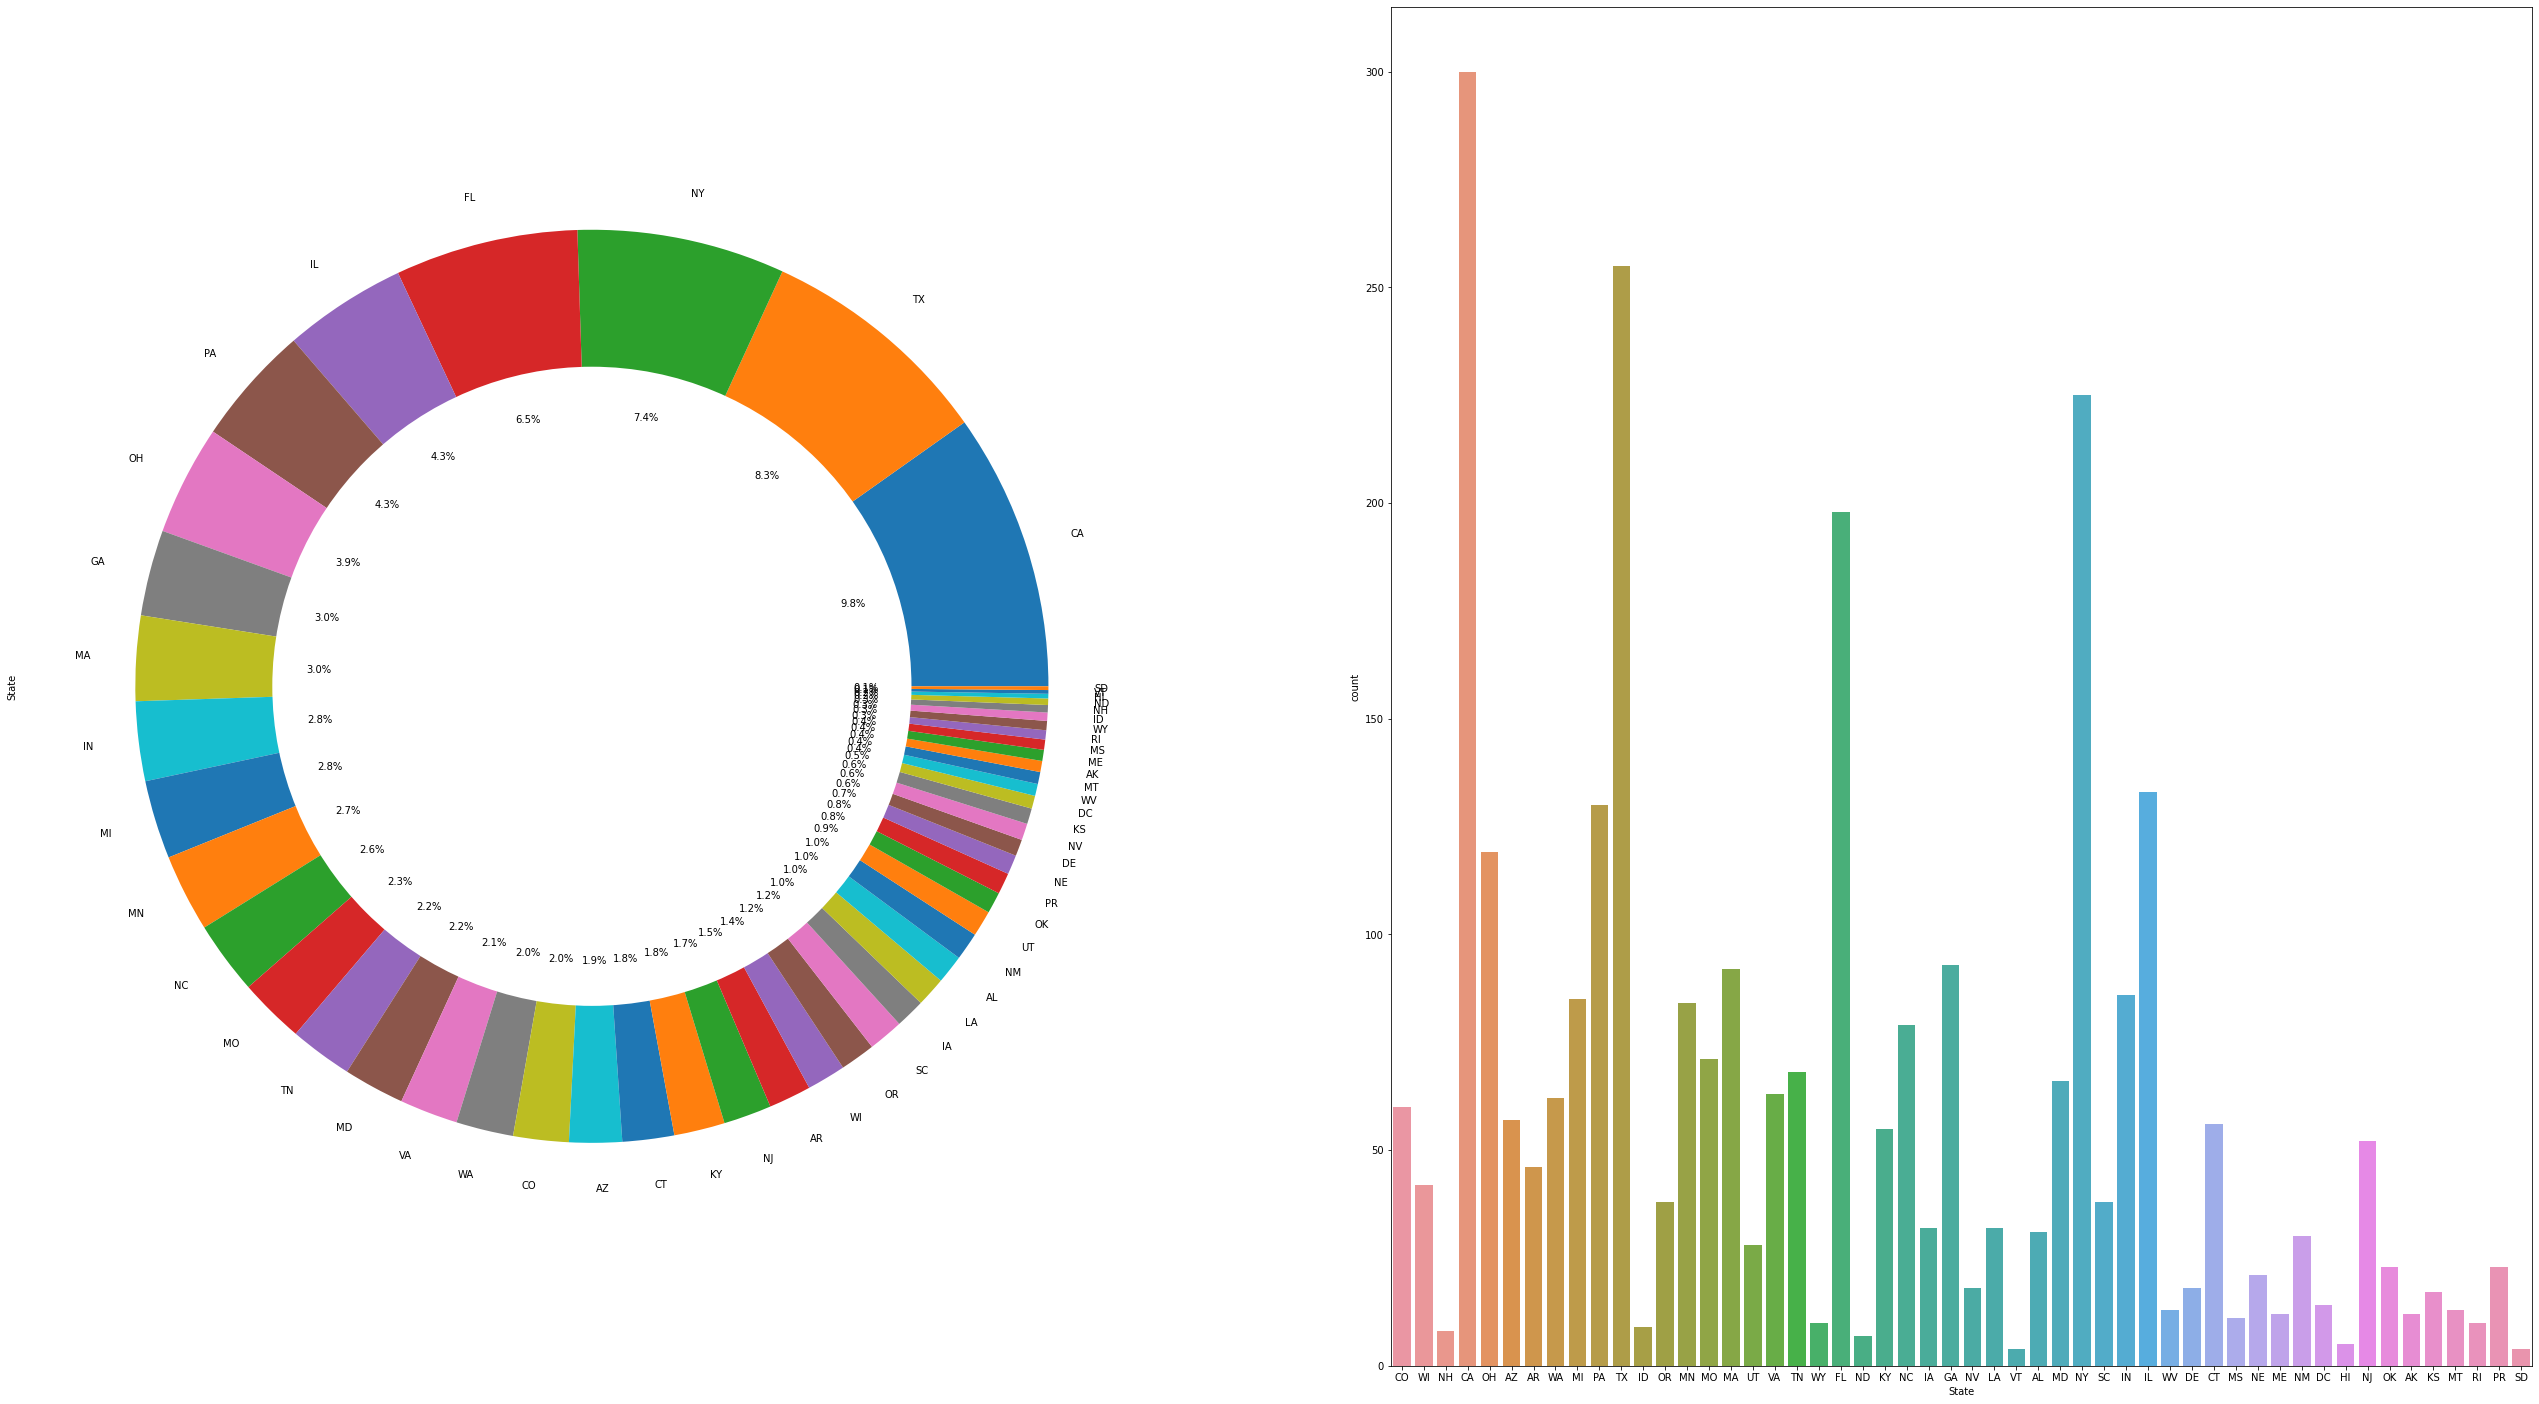

In [7]:
plt.figure(figsize=(45,25))
plt.subplot(1,2,1)
df['State'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='State',data=df)
df['State'].value_counts()

Healthcare Provider          2289
Business Associate            430
Health Plan                   333
Healthcare Clearing House       6
Name: Covered Entity Type, dtype: int64

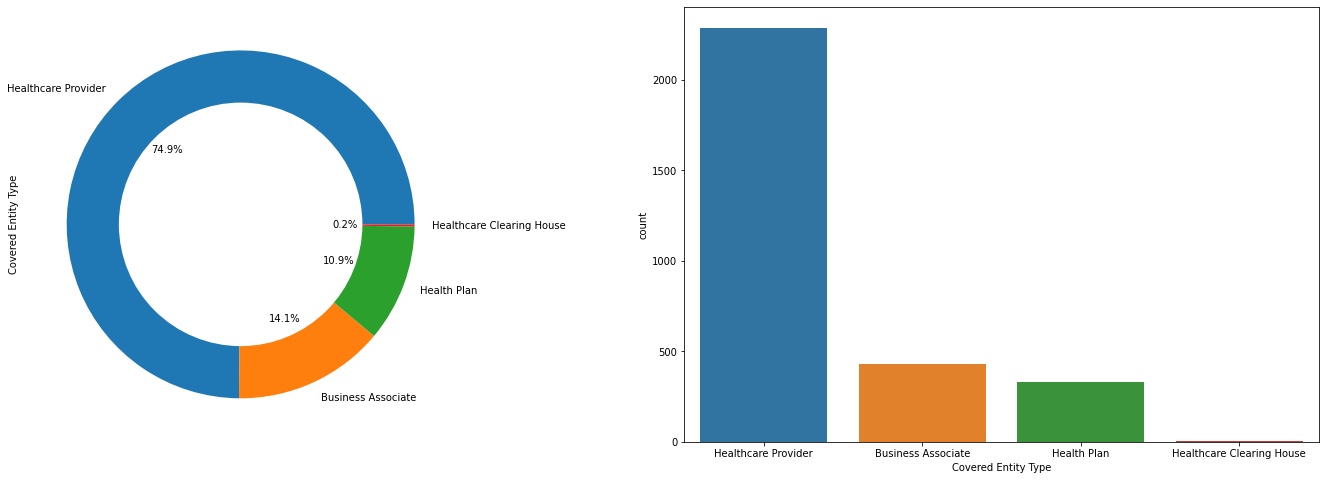

In [8]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
df['Covered Entity Type'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Covered Entity Type',data=df)
df['Covered Entity Type'].value_counts()

Hacking/IT Incident                                           1236
Theft                                                          770
Unauthorized Access/Disclosure                                 655
Loss                                                           151
Improper Disposal                                               77
Other                                                           77
Theft, Unauthorized Access/Disclosure                           24
Loss, Theft                                                     14
Unknown                                                          9
Hacking/IT Incident, Unauthorized Access/Disclosure              8
Other, Unauthorized Access/Disclosure                            7
Improper Disposal, Loss                                          3
Other, Theft                                                     3
Loss, Unauthorized Access/Disclosure                             3
Improper Disposal, Loss, Theft                                

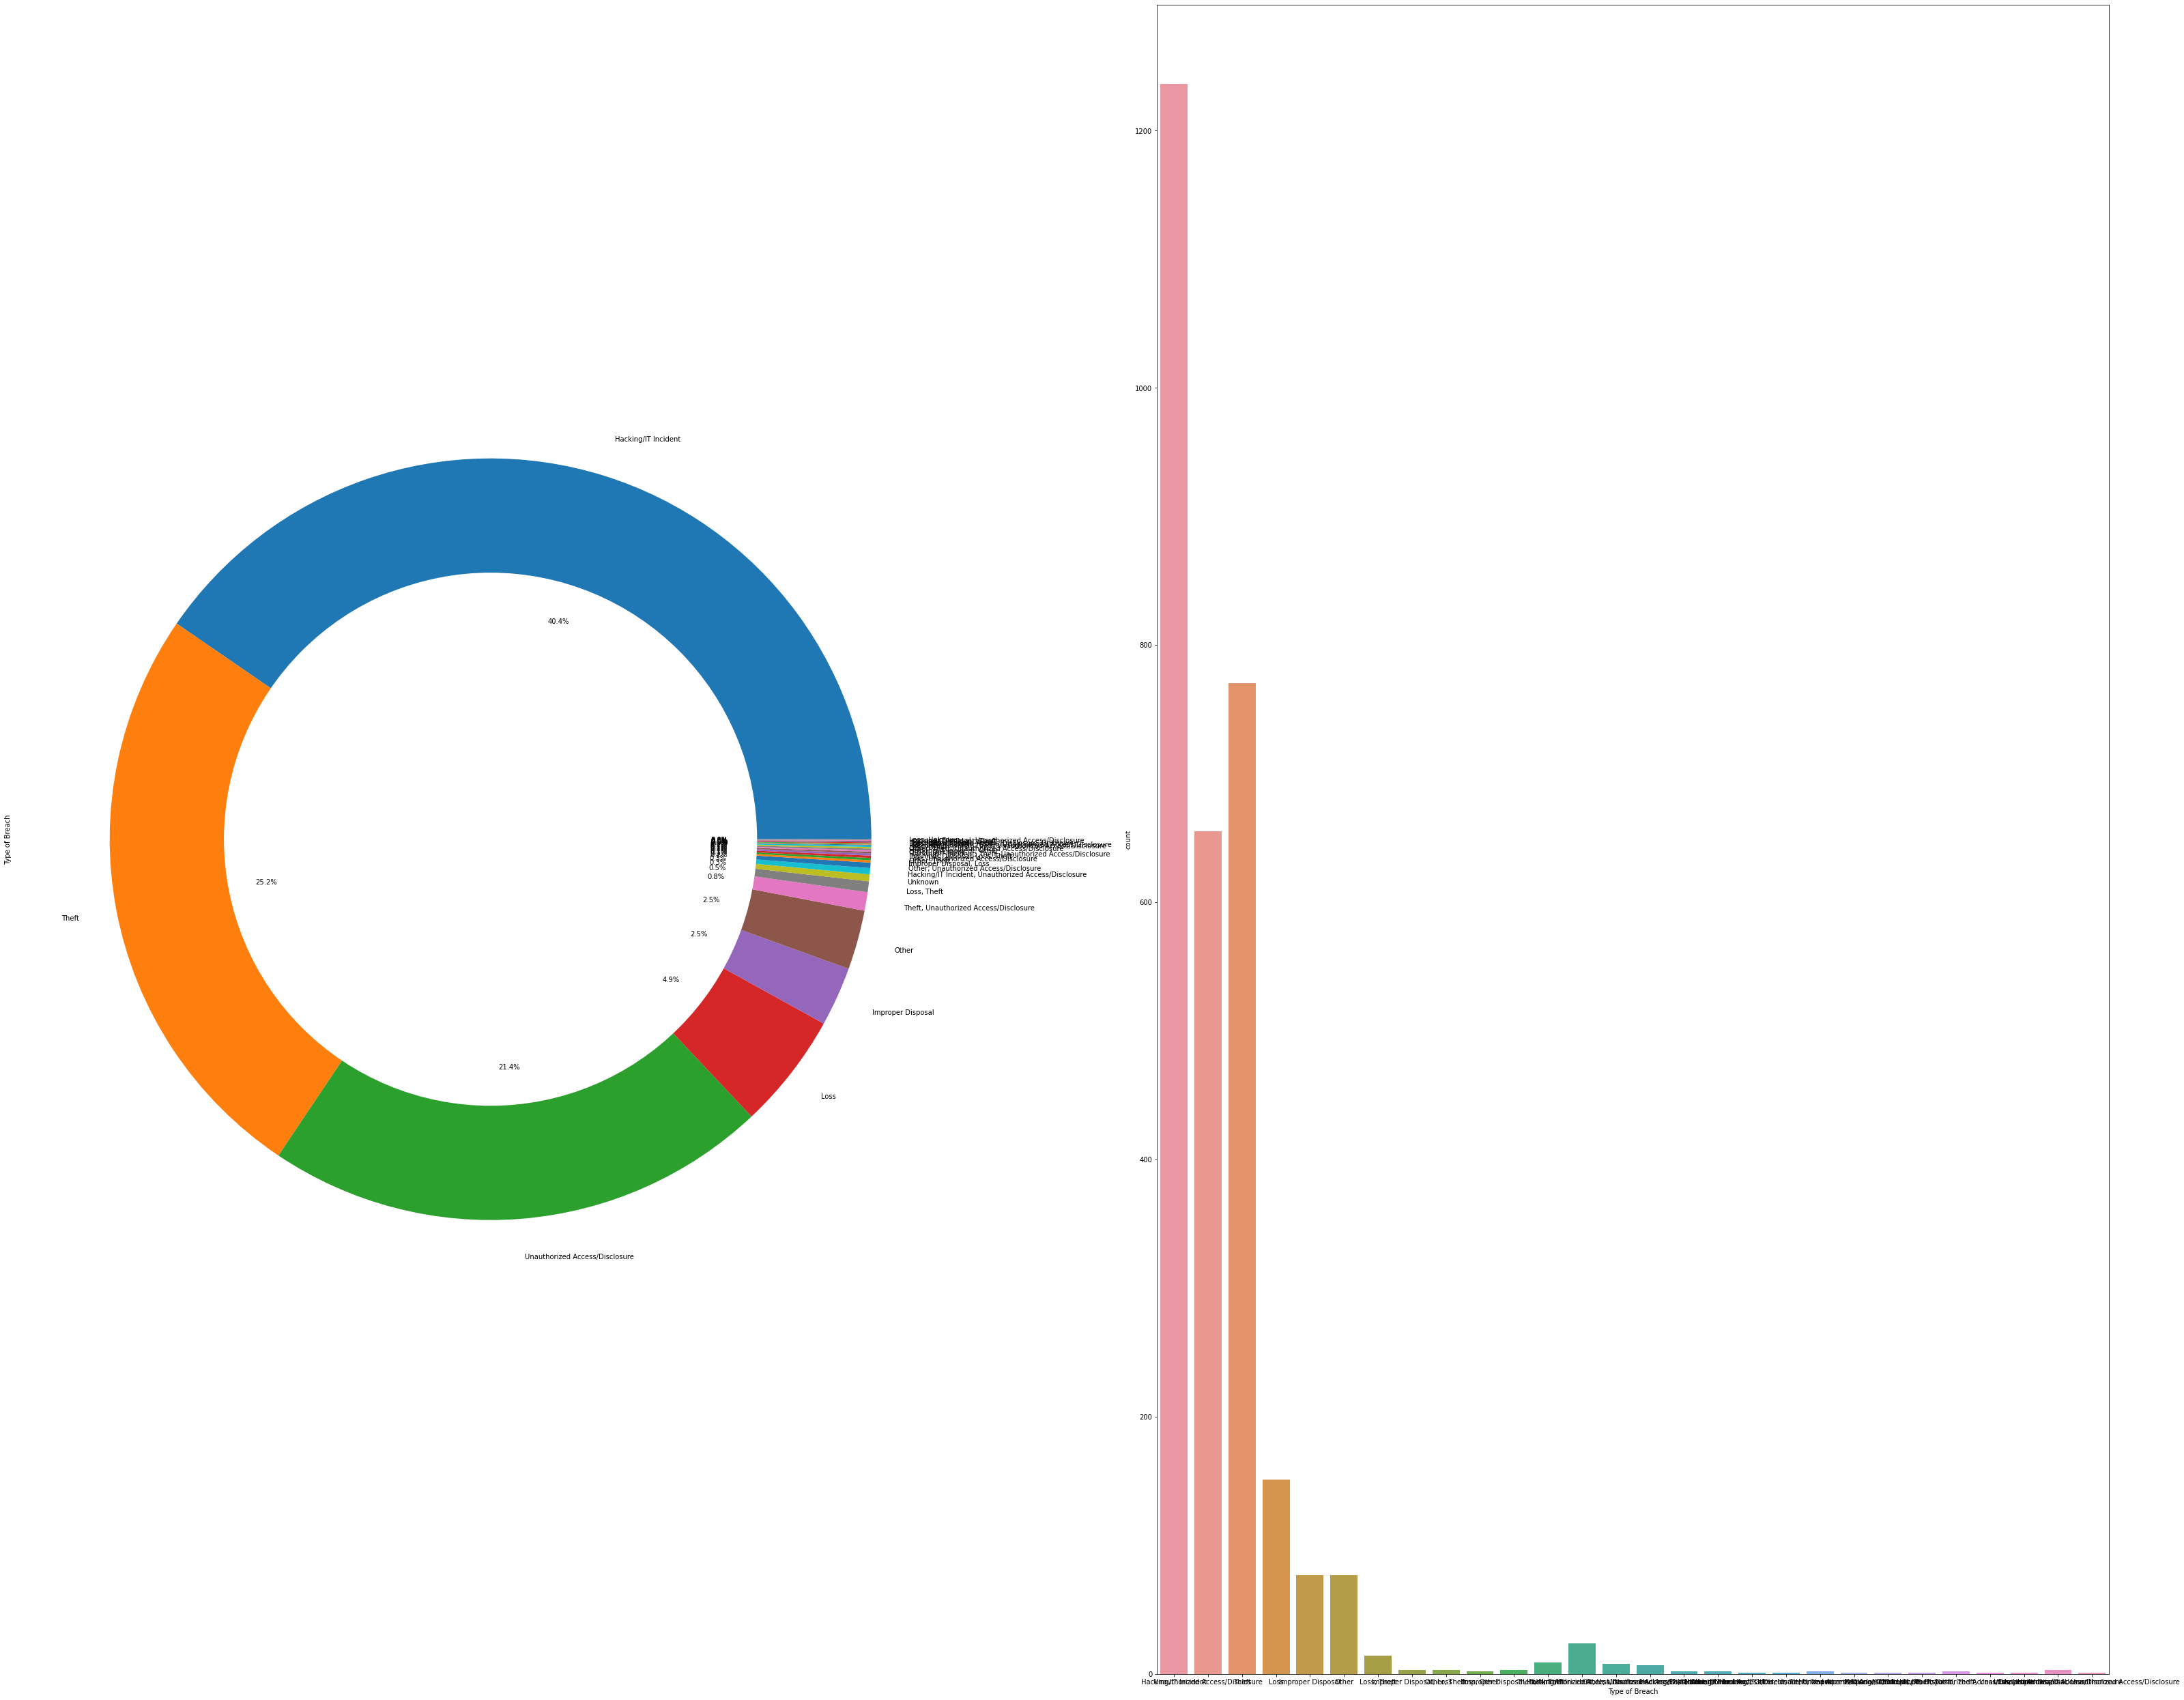

In [9]:
plt.figure(figsize=(55,45))
plt.subplot(1,2,1)
df['Type of Breach'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Type of Breach',data=df)
df['Type of Breach'].value_counts()

Network Server                                                                              678
Email                                                                                       671
Paper/Films                                                                                 496
Laptop                                                                                      294
Other                                                                                       211
                                                                                           ... 
Desktop Computer, Electronic Medical Record, Email, Network Server, Paper/Films               1
Electronic Medical Record, Laptop, Paper/Films                                                1
Desktop Computer, Network Server, Other, Other Portable Electronic Device                     1
Desktop Computer, Email, Laptop, Network Server, Other, Other Portable Electronic Device      1
Laptop, Other Portable Electronic Device

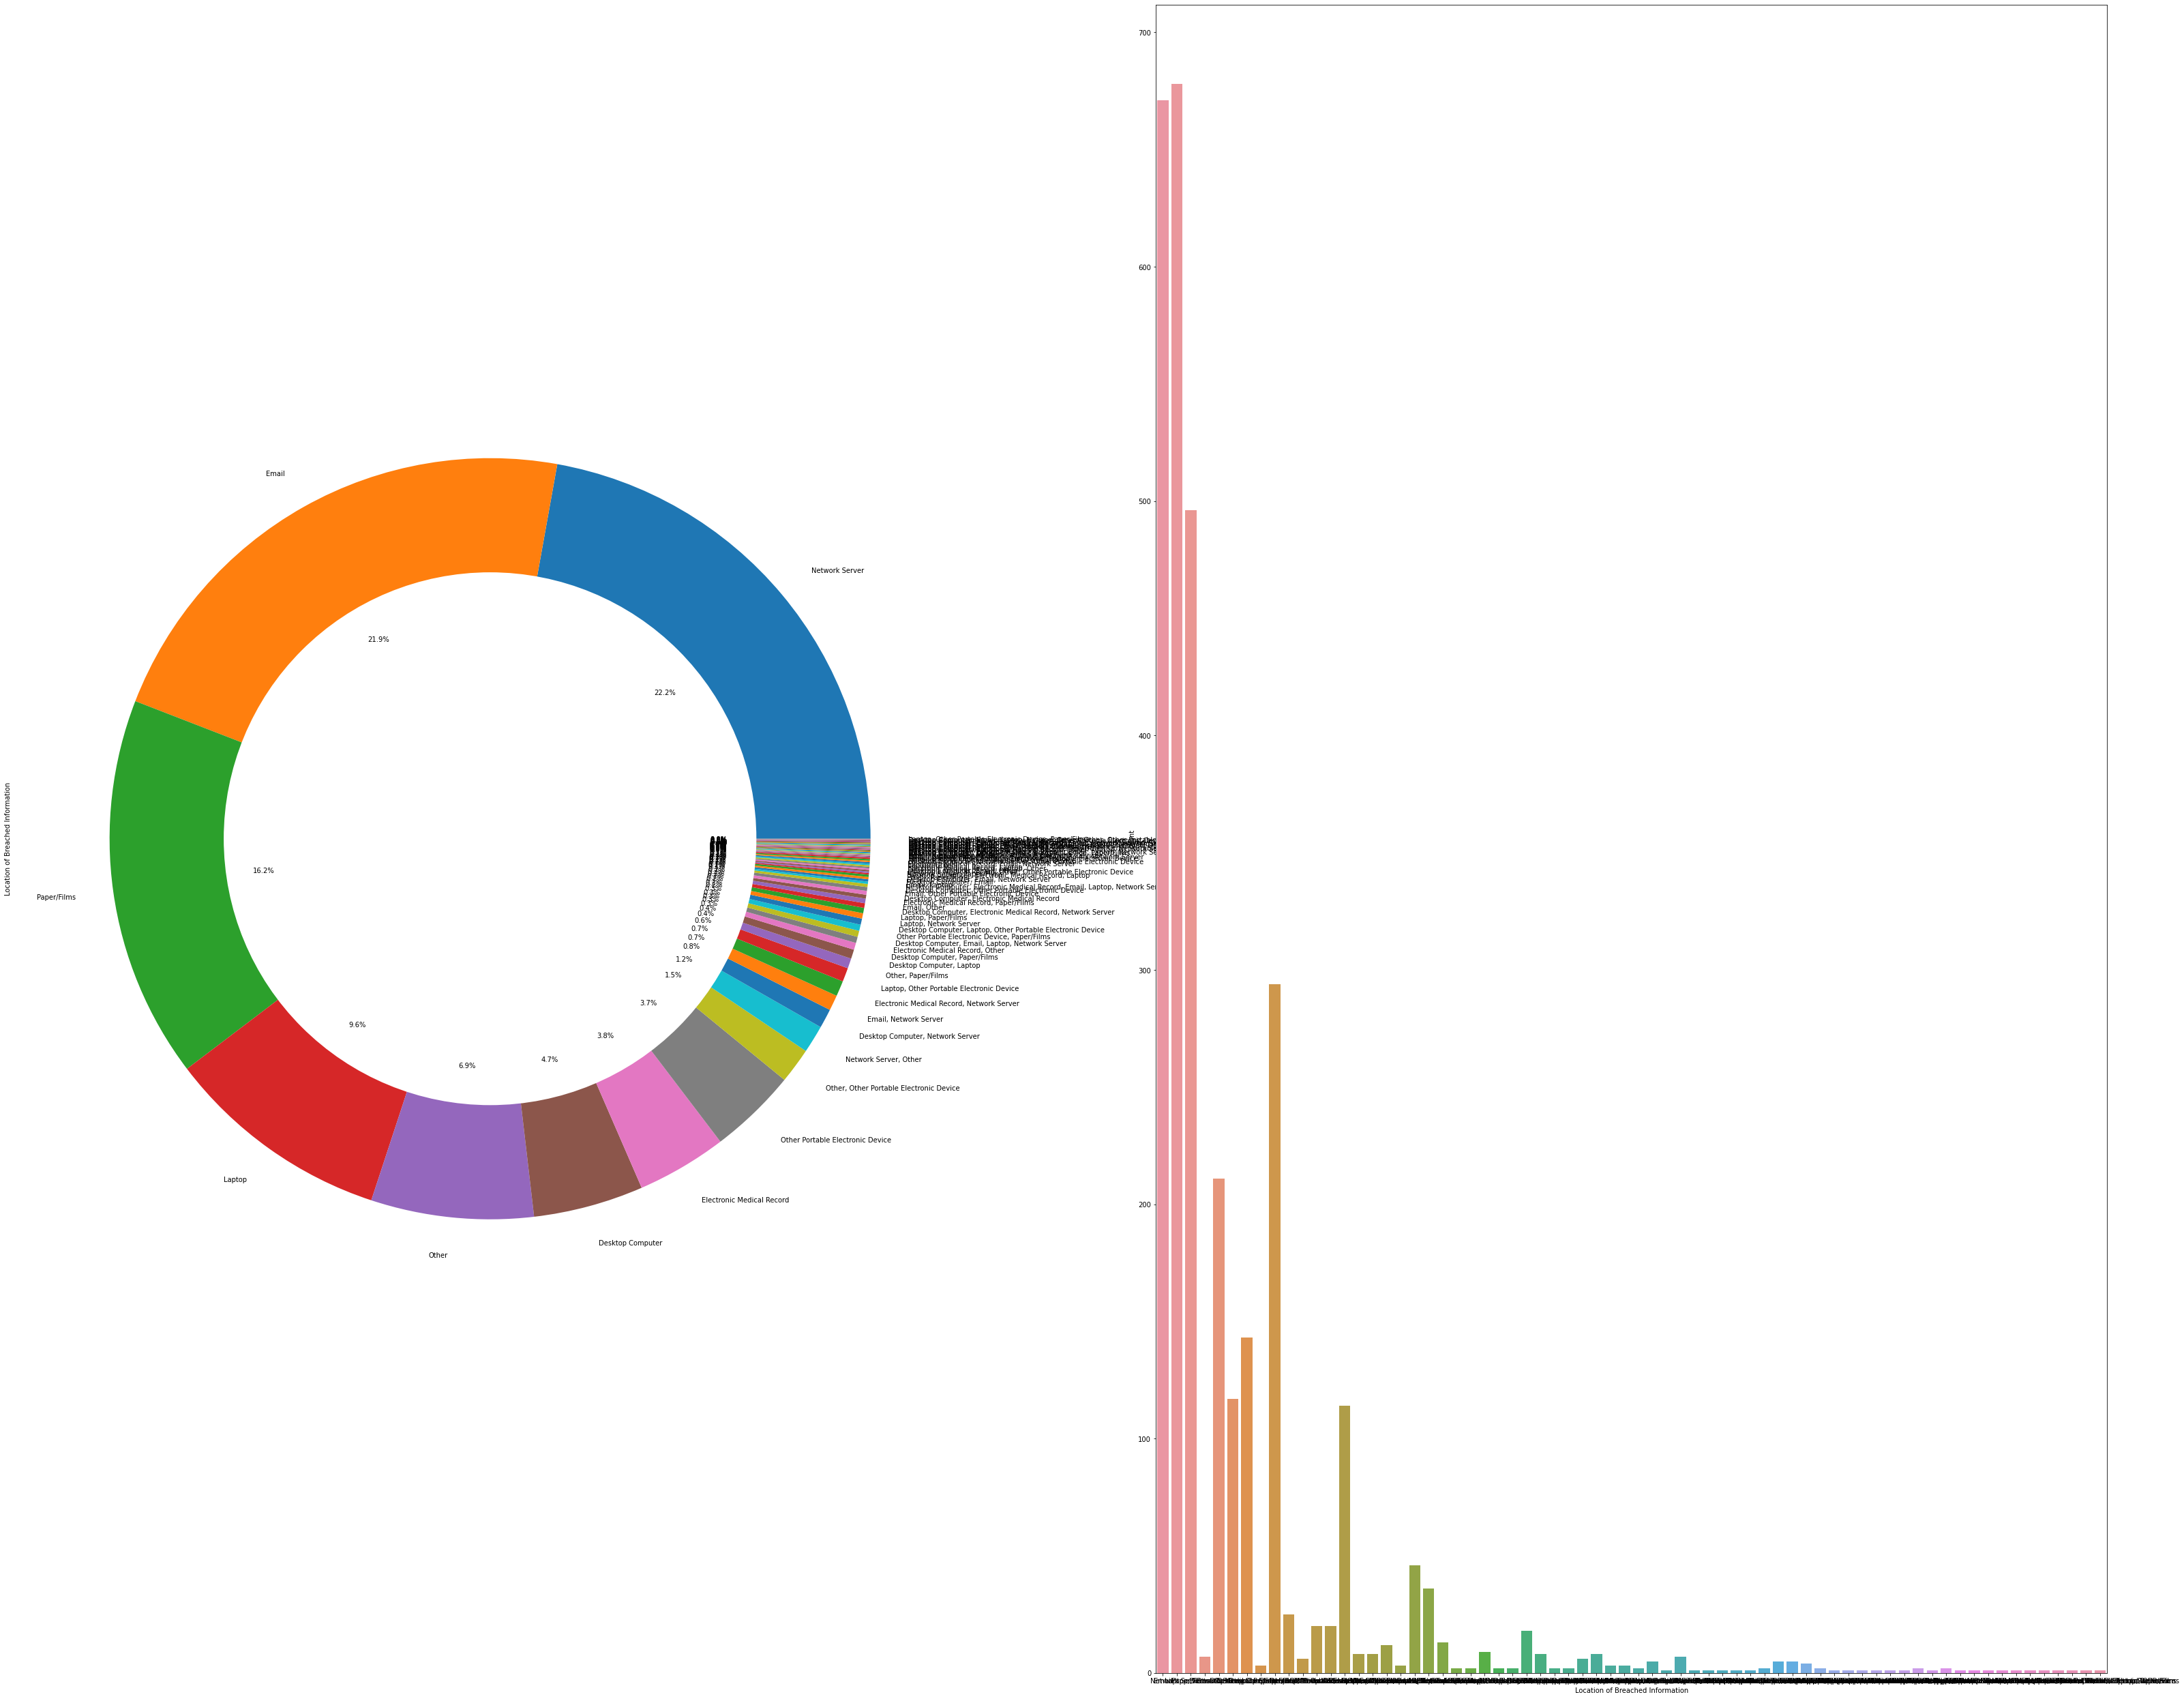

In [10]:
plt.figure(figsize=(55,45))
plt.subplot(1,2,1)
df['Location of Breached Information'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Location of Breached Information',data=df)
df['Location of Breached Information'].value_counts()

No     2325
Yes     733
Name: Business Associate Present, dtype: int64

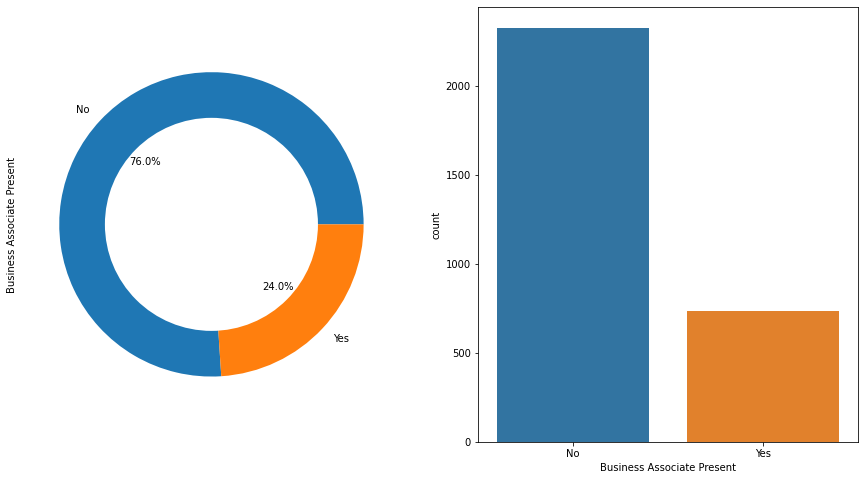

In [11]:
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
df['Business Associate Present'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Business Associate Present',data=df)
df['Business Associate Present'].value_counts()

## Bivariate Analysis

<AxesSubplot:xlabel='Covered Entity Type', ylabel='count'>

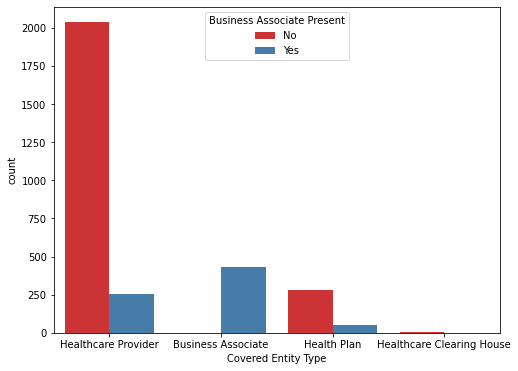

In [12]:
# Covered Entity Type vs. Business Associate Present
plt.figure(figsize=(8,6))
sns.countplot(df['Covered Entity Type'],hue=df['Business Associate Present'],palette='Set1')

<AxesSubplot:xlabel='Type of Breach', ylabel='count'>

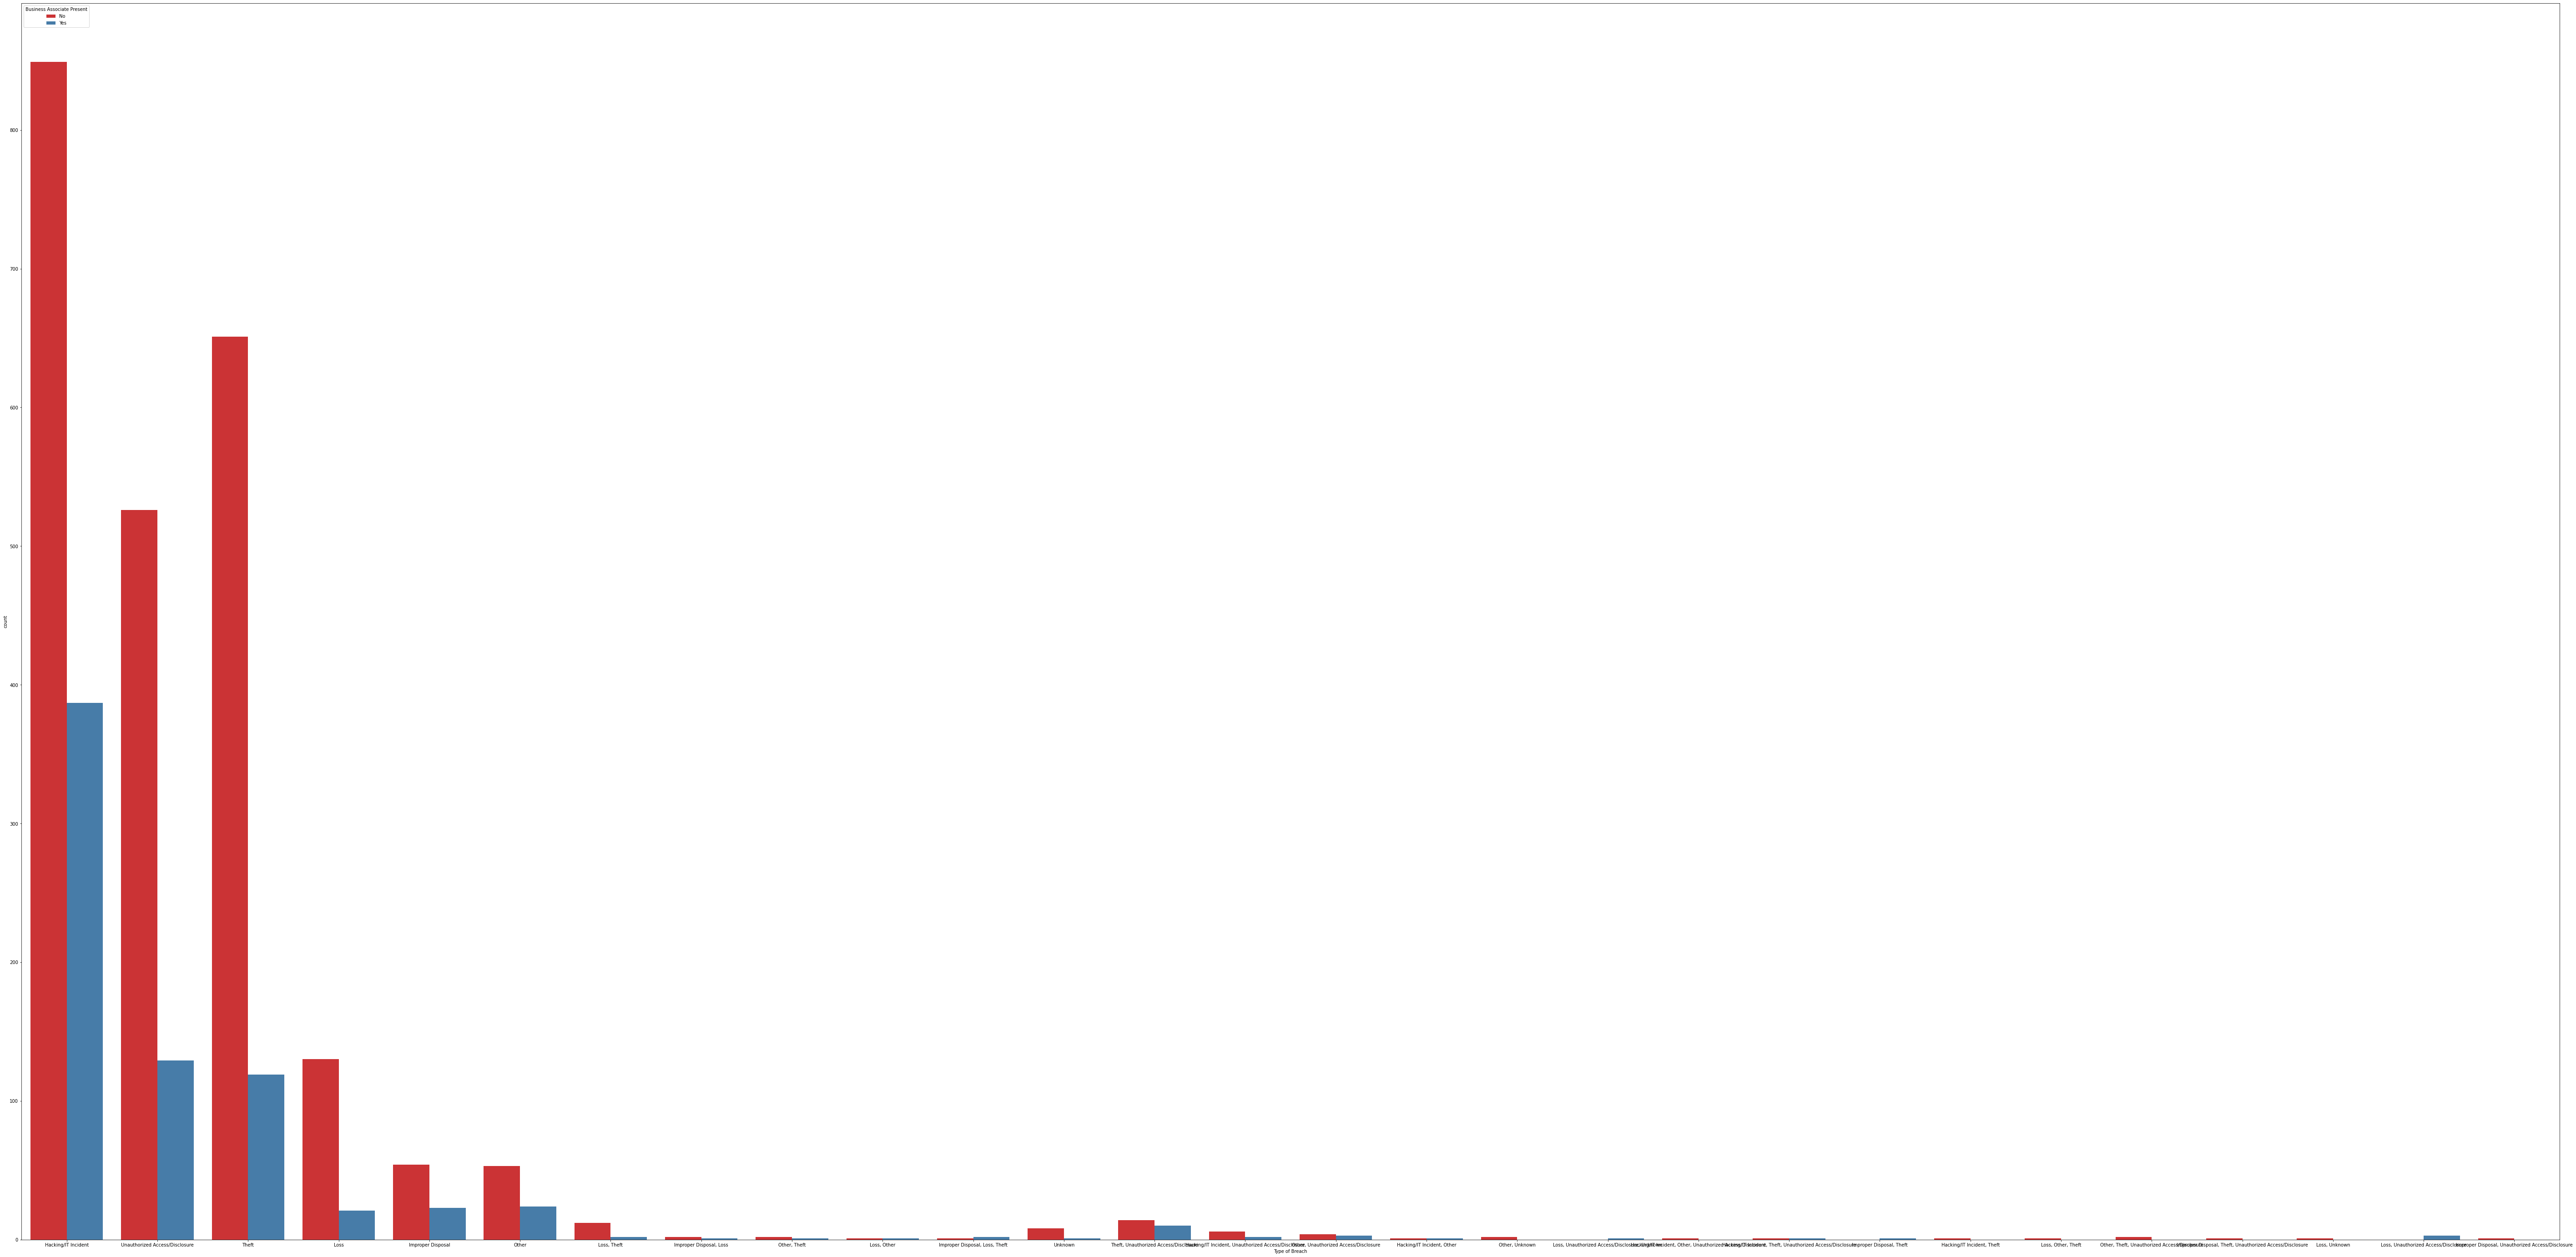

In [13]:
# Type of Breach vs. Business Associate Present
plt.figure(figsize=(100,50))
sns.countplot(df['Type of Breach'],hue=df['Business Associate Present'],palette='Set1')

<AxesSubplot:xlabel='Location of Breached Information', ylabel='count'>

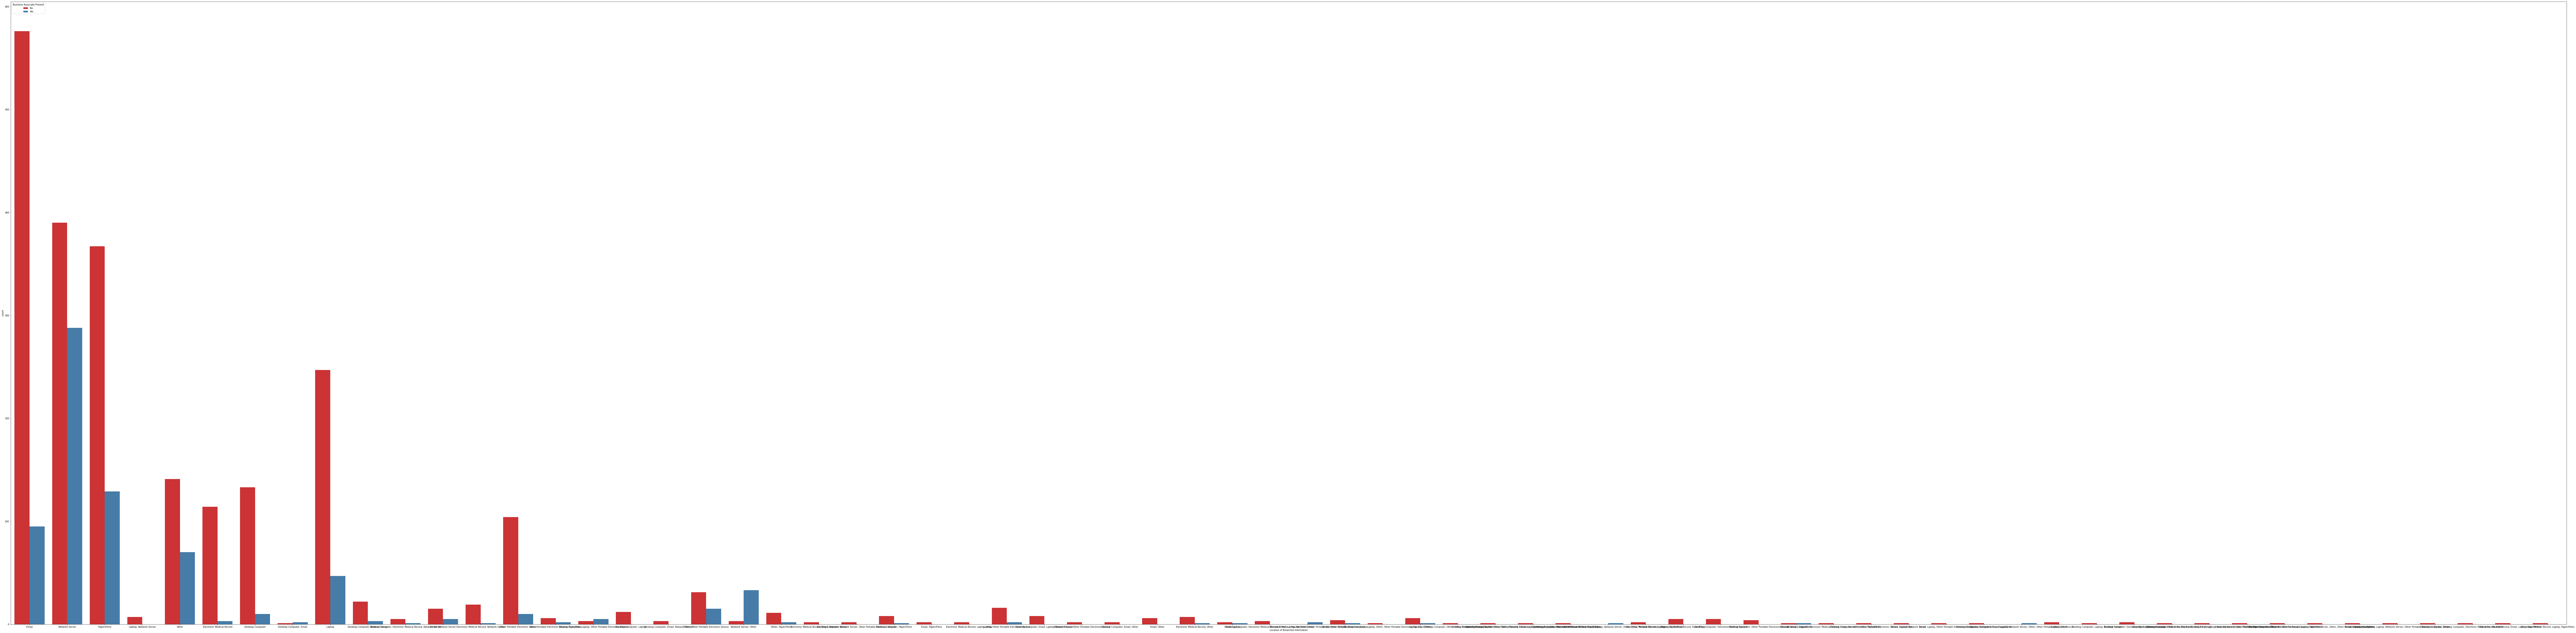

In [14]:
# Location of Breached Information vs. Business Associate Present
plt.figure(figsize=(200,50))
sns.countplot(df['Location of Breached Information'],hue=df['Business Associate Present'],palette='Set1')

## Multivariate Analysis

<AxesSubplot:xlabel='Type of Breach', ylabel='Location of Breached Information'>

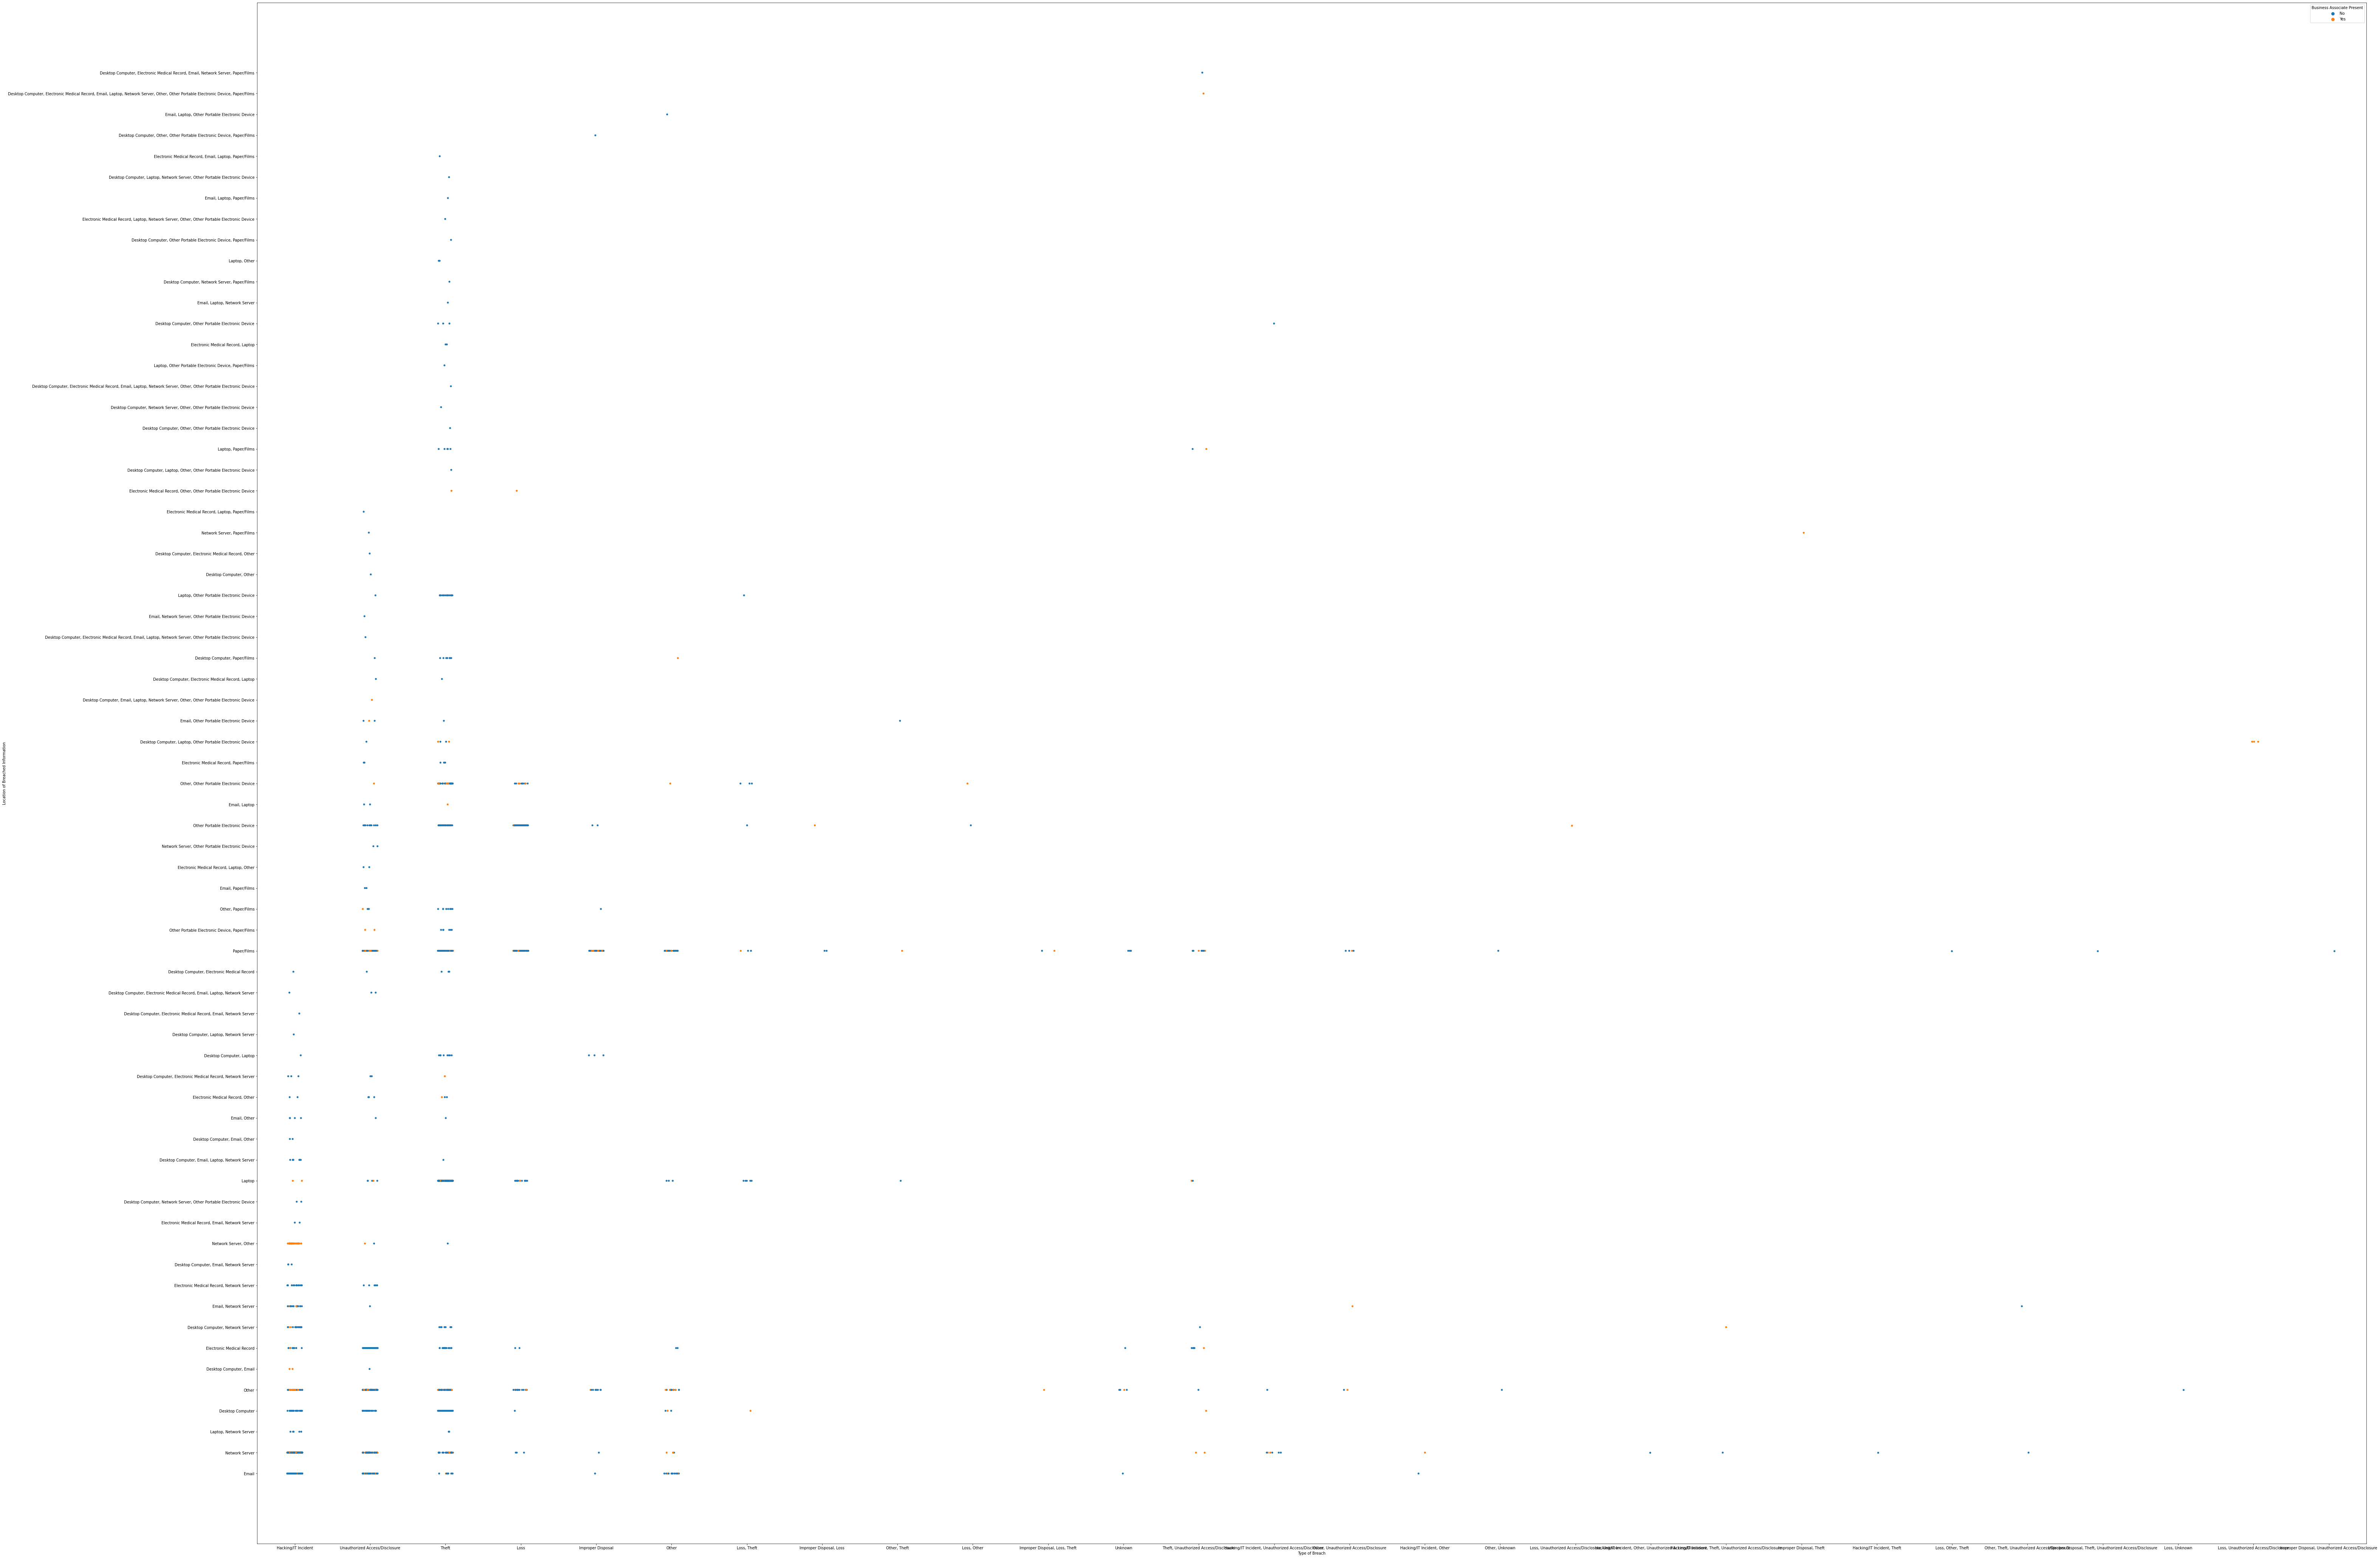

In [15]:
plt.figure(figsize=(100,75))
sns.stripplot(x='Type of Breach',y='Location of Breached Information',hue='Business Associate Present',data=df)